In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Data Pre-Processing

In [2]:
df = pd.read_csv('Downloads/predictive_maintenance.csv')
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [18]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data_balanced)
profile.to_file(output_file="predictive_maintenance_visualisation.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df=df.drop("Product ID",axis=1)
df=df.drop("UDI",axis=1)

In [4]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
# Replace NaN values with the mean of the respective columns (numeric only)
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [5]:
label_encoder = LabelEncoder()
# Fit and transform the data
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])

In [7]:
from sklearn.preprocessing import MinMaxScaler
# Normalize numerical features to a specific range (e.g., 0 to 1)
numeric_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [8]:
df.describe()

Type  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean       1.19940             0.511405                 0.531551   
std        0.60023             0.217419                 0.183177   
min        0.00000             0.000000                 0.000000   
25%        1.00000             0.326087                 0.382716   
50%        1.00000             0.521739                 0.543210   
75%        2.00000             0.673913                 0.666667   
max        2.00000             1.000000                 1.000000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  \
count            10000.000000  10000.000000     10000.000000  10000.000000   
mean                 0.215818      0.497073         0.426684      0.033900   
std                  0.104356      0.136936         0.251597      0.180981   
min                  0.000000      0.000000         0.000000      0.000000   
25%                  0.148428      0.403846         0.209486      0.000000   
50%                  0.194994      0.498626         0.426877      0.000000   
75%                  0.258440      0.590659         0.640316      0.000000   
max                  1.000000      1.000000         1.000000      1.000000   

       Failure Type  
count  10000.000000  
mean       1.039000  
std        0.379069  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        5.000000

In [9]:
df

Type  Air temperature [K]  Process temperature [K]  \
0        2             0.304348                 0.358025   
1        1             0.315217                 0.370370   
2        1             0.304348                 0.345679   
3        1             0.315217                 0.358025   
4        1             0.315217                 0.370370   
...    ...                  ...                      ...   
9995     2             0.380435                 0.333333   
9996     0             0.391304                 0.333333   
9997     2             0.402174                 0.358025   
9998     0             0.402174                 0.370370   
9999     2             0.402174                 0.370370   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                   0.222934     0.535714         0.000000       0   
1                   0.139697     0.583791         0.011858       0   
2                   0.192084     0.626374         0.019763       0   
3                   0.154249     0.490385         0.027668       0   
4                   0.139697     0.497253         0.035573       0   
...                      ...          ...              ...     ...   
9995                0.253783     0.353022         0.055336       0   
9996                0.270081     0.384615         0.067194       0   
9997                0.277648     0.406593         0.086957       0   
9998                0.139697     0.614011         0.098814       0   
9999                0.193248     0.500000         0.118577       0   

      Failure Type  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  
9995             1  
9996             1  
9997             1  
9998             1  
9999             1  

[10000 rows x 8 columns]

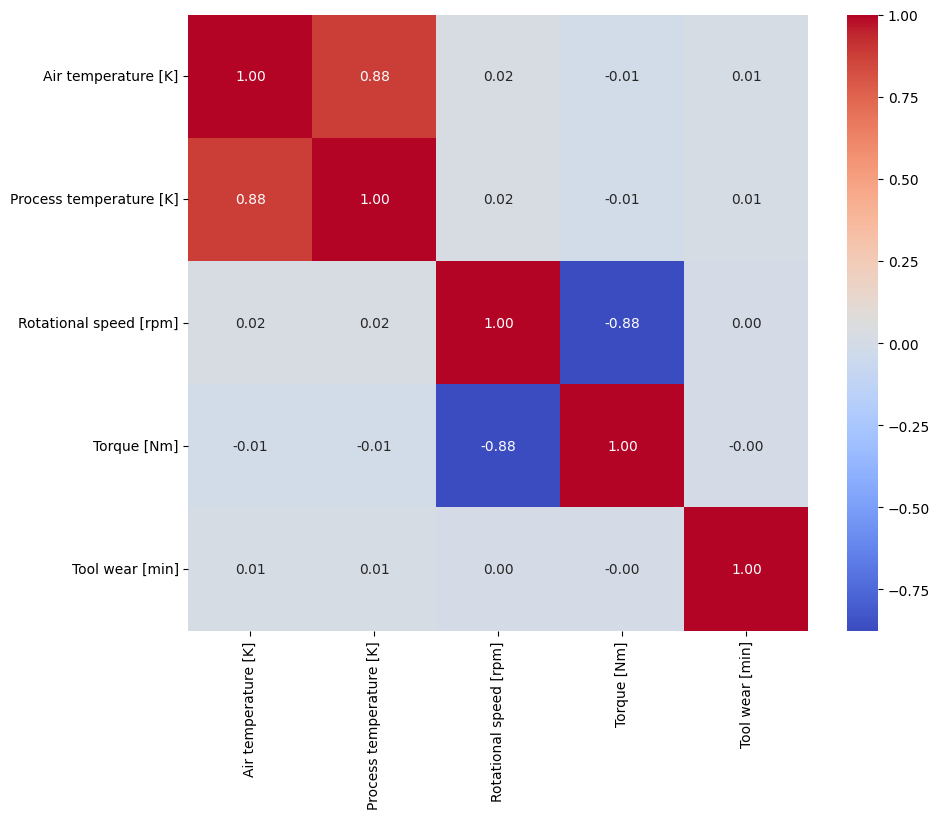

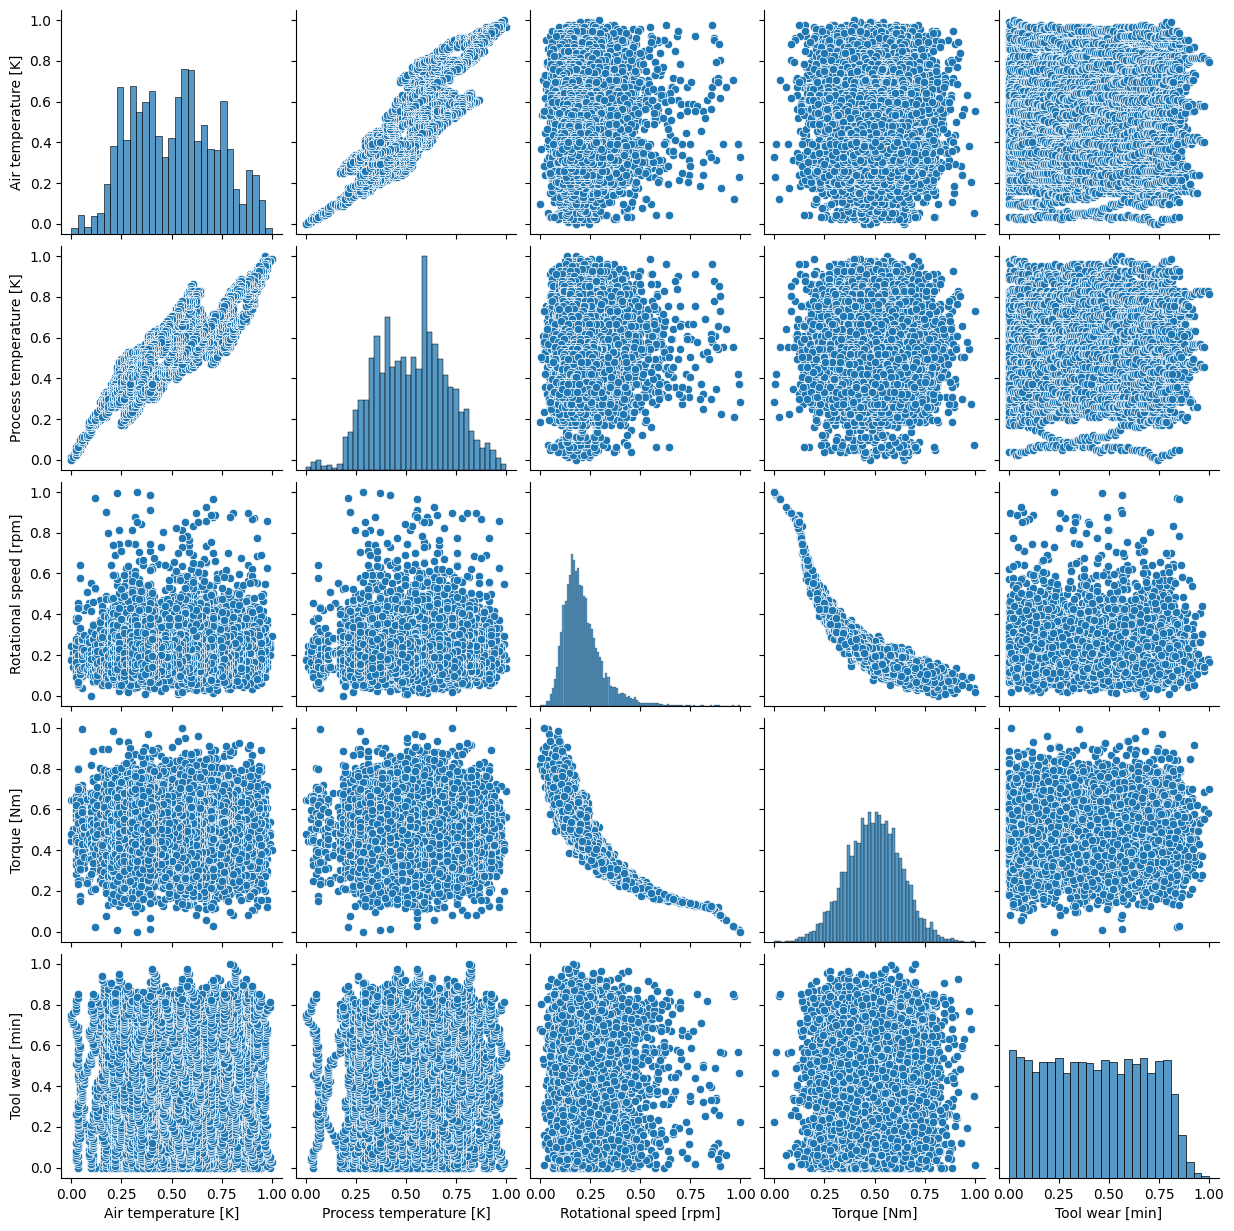

In [24]:
correlation_matrix = df[numeric_features].corr()

# Heatmap de la matrice de corrélation

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Diagrammes de dispersion pour quelques paires de variables
sns.pairplot(df[numeric_features])
#plt.show()

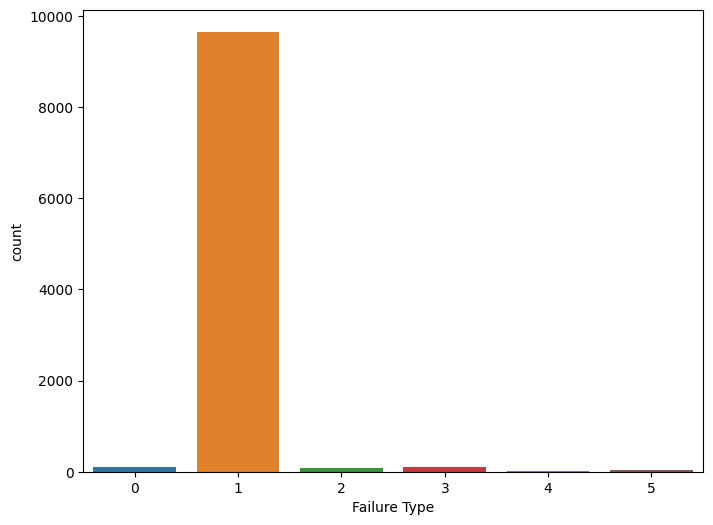

In [25]:
# Diagramme à barres pour la variable cible
plt.figure(figsize=(8, 6))
sns.countplot(x='Failure Type', data=df)
plt.show()


# Data Augmentation

In [10]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: Load your dataset
# Assuming you have a DataFrame named 'data' where 'X' are your features and 'y' is your target variable
# Replace 'X_column_names' with the actual names of your feature columns
X = df[['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']]
y = df['Failure Type']

# Step 2: Check the distribution of your target variable
print(y.value_counts())

# Step 3: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Step 4: Check the distribution of the balanced target variable
pd.Series(y_balanced).value_counts()

data_balanced = X_balanced.copy()
data_balanced['Failure Type'] = y_balanced

# Now you can use X_balanced and y_balanced for training your model


Failure Type
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64


In [12]:
df = data_balanced
df

Type  Air temperature [K]  Process temperature [K]  \
0         2             0.304348                 0.358025   
1         1             0.315217                 0.370370   
2         1             0.304348                 0.345679   
3         1             0.315217                 0.358025   
4         1             0.315217                 0.370370   
...     ...                  ...                      ...   
57907     1             0.329237                 0.454055   
57908     2             0.552315                 0.744842   
57909     1             0.687796                 0.630771   
57910     2             0.697574                 0.676029   
57911     1             0.598020                 0.604938   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                    0.222934     0.535714         0.000000       0   
1                    0.139697     0.583791         0.011858       0   
2                    0.192084     0.626374         0.019763       0   
3                    0.154249     0.490385         0.027668       0   
4                    0.139697     0.497253         0.035573       0   
...                       ...          ...              ...     ...   
57907                0.121901     0.580603         0.804303       1   
57908                0.221703     0.405702         0.827354       1   
57909                0.219216     0.478530         0.836284       1   
57910                0.287475     0.376752         0.850757       1   
57911                0.237632     0.468394         0.896493       1   

       Failure Type  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
57907             5  
57908             5  
57909             5  
57910             5  
57911             5  

[57912 rows x 8 columns]

# Deep Neural Network Architecture

In [17]:
# Split the dataset into features and labels
X = df.drop(['Failure Type'], axis=1).values.astype(np.float32)
y = df['Failure Type'].values.astype(int)

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create a PyTorch dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Define hyperparameters
batch_size = 64
input_size = X.shape[1]
num_classes = len(label_encoder.classes_)
hidden_size = 50
learning_rate = 0.001
num_epochs = 50

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


class MultiClassNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MultiClassNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

# Instantiate the model
model = MultiClassNN(input_size, hidden_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
# Training loop
for epoch in range(num_epochs):
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for batch_X, batch_y in dataloader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update total loss
        total_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == batch_y).sum().item()
        total_samples += batch_y.size(0)

    # Calculate average loss and accuracy
    avg_loss = total_loss / len(dataloader)
    accuracy = correct_predictions / total_samples

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')


Epoch [1/50], Loss: 1.4708, Accuracy: 0.6794
Epoch [2/50], Loss: 1.2482, Accuracy: 0.8415
Epoch [3/50], Loss: 1.2046, Accuracy: 0.8694
Epoch [4/50], Loss: 1.1824, Accuracy: 0.8906
Epoch [5/50], Loss: 1.1689, Accuracy: 0.9006
Epoch [6/50], Loss: 1.1598, Accuracy: 0.9060
Epoch [7/50], Loss: 1.1532, Accuracy: 0.9092
Epoch [8/50], Loss: 1.1481, Accuracy: 0.9124
Epoch [9/50], Loss: 1.1440, Accuracy: 0.9143
Epoch [10/50], Loss: 1.1406, Accuracy: 0.9167
Epoch [11/50], Loss: 1.1377, Accuracy: 0.9184
Epoch [12/50], Loss: 1.1352, Accuracy: 0.9196
Epoch [13/50], Loss: 1.1328, Accuracy: 0.9210
Epoch [14/50], Loss: 1.1306, Accuracy: 0.9231
Epoch [15/50], Loss: 1.1288, Accuracy: 0.9235
Epoch [16/50], Loss: 1.1269, Accuracy: 0.9254
Epoch [17/50], Loss: 1.1249, Accuracy: 0.9269
Epoch [18/50], Loss: 1.1233, Accuracy: 0.9281
Epoch [19/50], Loss: 1.1219, Accuracy: 0.9288
Epoch [20/50], Loss: 1.1206, Accuracy: 0.9303
Epoch [21/50], Loss: 1.1194, Accuracy: 0.9309
Epoch [22/50], Loss: 1.1183, Accuracy: 0.93

# Hyperparameter Tuning

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define your neural network architecture
class MultiClassNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MultiClassNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

# Define a wrapper class for PyTorch model to work with scikit-learn
class TorchModelWrapper(BaseEstimator):
    def __init__(self, input_size, hidden_size, num_classes, learning_rate=0.001, optimizer=optim.Adam, num_epochs=10):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.num_epochs = num_epochs
        self.model = None

    def fit(self, X, y):
        # Prepare the data
        train_loader = DataLoader(TensorDataset(torch.tensor(X), torch.tensor(y, dtype=torch.long)), batch_size=64, shuffle=True)

        # Initialize the model
        self.model = MultiClassNN(self.input_size, self.hidden_size, self.num_classes)

        # Define loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = self.optimizer(self.model.parameters(), lr=self.learning_rate)

        # Training loop
        for epoch in range(self.num_epochs):
            for batch_X, batch_y in train_loader:
                # Forward pass
                outputs = self.model(batch_X)
                loss = criterion(outputs, batch_y)

                # Backward pass and optimization
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

    def score(self, X, y):
        # Prepare the data
        test_loader = DataLoader(TensorDataset(torch.tensor(X), torch.tensor(y, dtype=torch.long)), batch_size=64, shuffle=False)

        # Evaluation loop
        predictions = []
        true_labels = []
        with torch.no_grad():
            for batch_X, batch_y in test_loader:
                outputs = self.model(batch_X)
                _, predicted = torch.max(outputs, 1)
                predictions.extend(predicted.numpy())
                true_labels.extend(batch_y.numpy())

        # Calculate accuracy
        accuracy = accuracy_score(true_labels, predictions)
        return accuracy

# Define hyperparameters to search
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'optimizer': [optim.Adam, optim.SGD],
    'num_epochs': [10, 20, 30],
}

# Perform GridSearchCV
wrapper = TorchModelWrapper(input_size=X.shape[1], hidden_size=50, num_classes=len(np.unique(y)))
grid_search = GridSearchCV(estimator=wrapper, param_grid=param_grid, cv=3)
grid_search.fit(X, y)

# Print the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.01, 'num_epochs': 30, 'optimizer': <class 'torch.optim.adam.Adam'>}
Best Accuracy: 0.15050421328912833


# Visualization & Performance Metrics Calculation

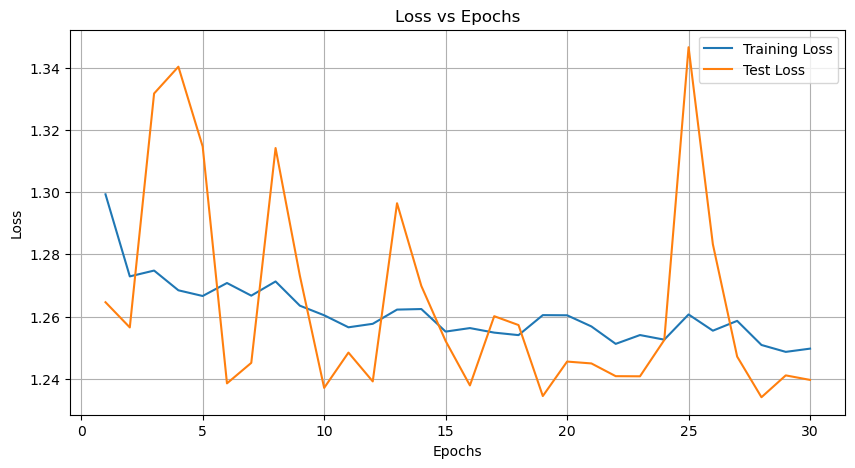

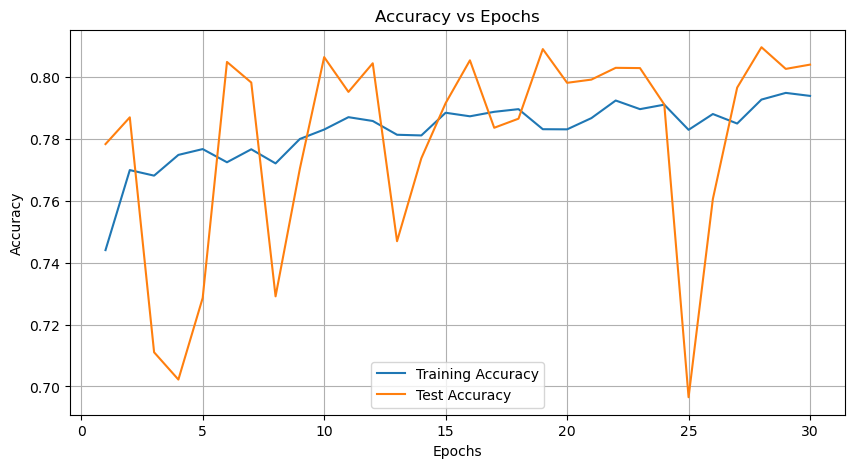

Training Accuracy: 0.8043558030607179
Test Accuracy: 0.8038504705171372
Training Precision: 0.8418662430742659
Test Precision: 0.8429127396693958
Training Recall: 0.8043558030607179
Test Recall: 0.8038504705171372
Training F1 Score: 0.7821974305179177
Test F1 Score: 0.7820130227607487


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Define your neural network architecture
class MultiClassNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MultiClassNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

# Prepare the data
X = df[['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']]
y = df['Failure Type']
# Assuming X_train, X_test, y_train, y_test are your train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_loader = DataLoader(TensorDataset(torch.tensor(X_train.values.astype(np.float32)), torch.tensor(y_train.values.astype(np.int64))))
test_loader = DataLoader(TensorDataset(torch.tensor(X_test.values.astype(np.float32)), torch.tensor(y_test.values.astype(np.int64))))

# Define hyperparameters
input_size = X_train.shape[1]
hidden_size = 50
num_classes = len(np.unique(y_train))
learning_rate = 0.01
num_epochs = 30

# Initialize the model
model = MultiClassNN(input_size, hidden_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store loss and accuracy values
train_loss_values = []
test_loss_values = []
train_accuracy_values = []
test_accuracy_values = []

# Training loop
for epoch in range(num_epochs):
    # Training
    model.train()
    correct_train = 0
    total_train = 0
    running_train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += batch_y.size(0)
        correct_train += (predicted == batch_y).sum().item()

    train_loss_values.append(running_train_loss / len(train_loader))
    train_accuracy_values.append(correct_train / total_train)

    # Testing
    model.eval()
    correct_test = 0
    total_test = 0
    running_test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            running_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += batch_y.size(0)
            correct_test += (predicted == batch_y).sum().item()

    test_loss_values.append(running_test_loss / len(test_loader))
    test_accuracy_values.append(correct_test / total_test)

# Plotting loss vs epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_loss_values, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_loss_values, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plotting accuracy vs epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracy_values, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracy_values, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Calculate evaluation metrics
model.eval()
with torch.no_grad():
    y_train_pred = torch.argmax(model(torch.tensor(X_train.values.astype(np.float32))).data, dim=1)
    y_test_pred = torch.argmax(model(torch.tensor(X_test.values.astype(np.float32))).data, dim=1)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Training Precision:", train_precision)
print("Test Precision:", test_precision)

print("Training Recall:", train_recall)
print("Test Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Test F1 Score:", test_f1)


# Regularization Techniques

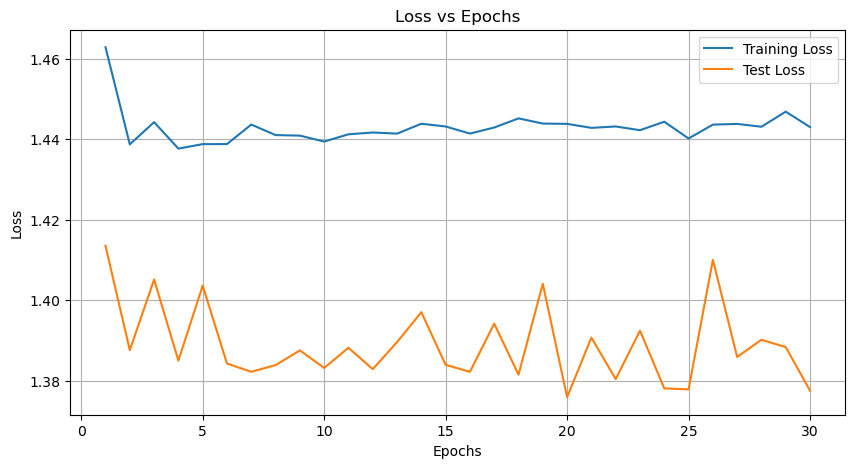

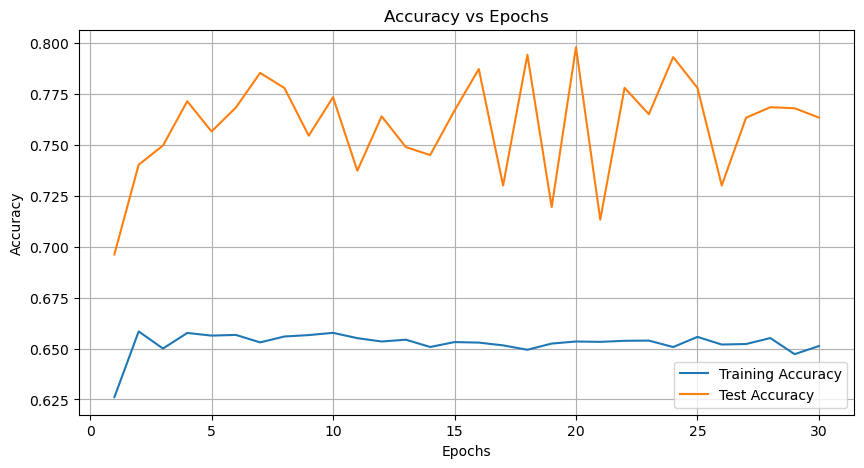

Training Accuracy: 0.7662802995963651
Test Accuracy: 0.7633600966934301
Training Precision: 0.7851855004212143
Test Precision: 0.7833191055091069
Training Recall: 0.7662802995963651
Test Recall: 0.7633600966934301
Training F1 Score: 0.7592453828322786
Test F1 Score: 0.7561299968453192


In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Define your neural network architecture with regularization
class RegularizedMultiClassNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_rate=0.2, l1_reg=0.0, l2_reg=0.0):
        super(RegularizedMultiClassNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)
        self.l1_reg = l1_reg
        self.l2_reg = l2_reg

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

# Prepare the data
# Assuming X_train, X_test, y_train, y_test are your train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_loader = DataLoader(TensorDataset(torch.tensor(X_train.values.astype(np.float32)), torch.tensor(y_train.values.astype(np.int64))))
test_loader = DataLoader(TensorDataset(torch.tensor(X_test.values.astype(np.float32)), torch.tensor(y_test.values.astype(np.int64))))

# Define hyperparameters
input_size = X_train.shape[1]
hidden_size = 50
num_classes = len(np.unique(y_train))
learning_rate = 0.01
num_epochs = 30

# Initialize the model with regularization
model = RegularizedMultiClassNN(input_size, hidden_size, num_classes, dropout_rate=0.2, l1_reg=0.001, l2_reg=0.001)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)

# Lists to store loss and accuracy values
train_loss_values = []
test_loss_values = []
train_accuracy_values = []
test_accuracy_values = []

# Training loop
for epoch in range(num_epochs):
    # Training
    model.train()
    correct_train = 0
    total_train = 0
    running_train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        running_train_loss += loss.item()
        loss += model.l1_reg * sum(p.abs().sum() for p in model.parameters())
        loss += model.l2_reg * sum(p.pow(2).sum() for p in model.parameters())
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        total_train += batch_y.size(0)
        correct_train += (predicted == batch_y).sum().item()

    train_loss_values.append(running_train_loss / len(train_loader))
    train_accuracy_values.append(correct_train / total_train)

    # Testing
    model.eval()
    correct_test = 0
    total_test = 0
    running_test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            running_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += batch_y.size(0)
            correct_test += (predicted == batch_y).sum().item()

    test_loss_values.append(running_test_loss / len(test_loader))
    test_accuracy_values.append(correct_test / total_test)

# Plotting loss vs epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_loss_values, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_loss_values, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plotting accuracy vs epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracy_values, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracy_values, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Calculate evaluation metrics
model.eval()
with torch.no_grad():
    y_train_pred = torch.argmax(model(torch.tensor(X_train.values.astype(np.float32))).data, dim=1)
    y_test_pred = torch.argmax(model(torch.tensor(X_test.values.astype(np.float32))).data, dim=1)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Training Precision:", train_precision)
print("Test Precision:", test_precision)

print("Training Recall:", train_recall)
print("Test Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Test F1 Score:", test_f1)
